In [111]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import norm, skew
import datetime
import matplotlib.dates as mdates
%matplotlib inline

In [112]:
#表示カラム数の変更
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',200)

In [113]:
#データの読み込み
train = pd.read_csv('../.kaggle/sample_data/restaurant-revenue-prediction/train.csv')
test = pd.read_csv('../.kaggle/sample_data/restaurant-revenue-prediction/test.csv')

In [114]:
train.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0


In [115]:
test.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0


In [116]:
print('訓練データ',train.shape, 'テストデータ',test.shape)

訓練データ (137, 43) テストデータ (100000, 42)


In [117]:
#データの様子を確認
train.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [118]:
#訓練データとテストデータそれぞれに欠損値なし
test.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
dtype: int64

In [119]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
Id            137 non-null int64
Open Date     137 non-null object
City          137 non-null object
City Group    137 non-null object
Type          137 non-null object
P1            137 non-null int64
P2            137 non-null float64
P3            137 non-null float64
P4            137 non-null float64
P5            137 non-null int64
P6            137 non-null int64
P7            137 non-null int64
P8            137 non-null int64
P9            137 non-null int64
P10           137 non-null int64
P11           137 non-null int64
P12           137 non-null int64
P13           137 non-null float64
P14           137 non-null int64
P15           137 non-null int64
P16           137 non-null int64
P17           137 non-null int64
P18           137 non-null int64
P19           137 non-null int64
P20           137 non-null int64
P21           137 non-null int64
P22           137 non-nul

In [120]:
#統計量を見る.revenueの最大値が第3四分位点より3倍大きいものがある
#revenueの標準偏差が平均値の半分程度と、ばらつきまたは外れ値の影響を強く受けている？
train.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,3.262774,5.299270,5.080292,1.416058,1.386861,1.941606,1.036496,1.941606,4.905109,4.547445,2.270073,2.226277,3.423358,1.372263,1.211679,1.470803,1.145985,3.222628,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,1.910767,1.941668,1.036527,2.729583,2.398677,3.505807,2.030679,3.300549,5.604467,3.708041,2.052630,1.230690,4.559609,2.304112,2.133179,2.612024,2.067039,2.308806,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,2.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.500000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,2.000000,3.000000,1.000000,4.000000,5.000000,5.000000,3.000000,3.000000,5.000000,2.000000,2.000000,2.500000,2.000000,4.000000,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.500000,15.000000,10.000000,15.000000,15.000000,12.000000,25.000000,15.000000,15.000000,5.000000,25.000000,10.000000,10.000000,12.500000,12.500000,12.500000,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [121]:
#訓練データとテストデータの区別のため、フラグを付ける
train['DataIs'] = 'train'
test['DataIs'] = 'test'
test['revenue'] = 9999999999.0

In [122]:
train.shape, test.shape

((137, 44), (100000, 44))

mu = 4453532.61 and sigma = 2566652.66


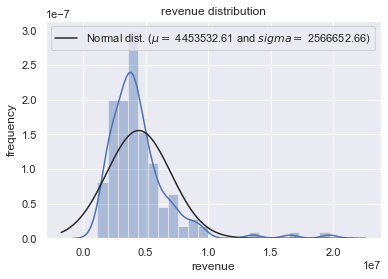

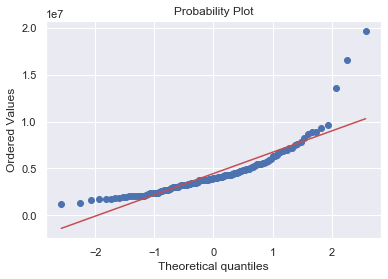

In [123]:
#目的変数(revenue)の分布をみる
#分布は右裾に広い。収益が分布の最頻値より3倍ある店舗がありそう
#fit=normで正規分布を描く
sns.distplot(train['revenue'], fit=norm)

#正規分布の平均値と標準偏差を抜き出す
(mu, sigma) = norm.fit(train['revenue'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#分布図を表示
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('frequency')
plt.title('revenue distribution')

#Q-Qプロット：得られたデータと理論分布を比較し、類似度を調べる
fig = plt.figure()
res = stats.probplot(train['revenue'], plot=plt)
plt.show()

mu = 15.19 and sigma = 0.48


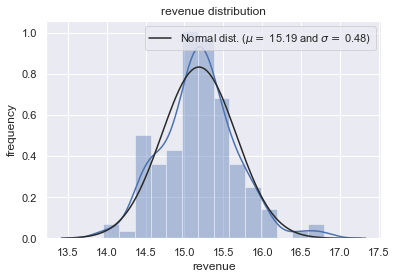

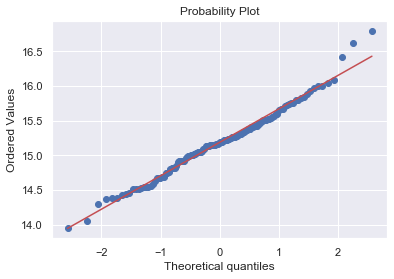

In [124]:
#log1pを使うlog(x+1)
train['revenue'] = np.log1p(train['revenue'])

#分布をみる
sns.distplot(train['revenue'], fit=norm)

#平均値と標準偏差を抜き出す
(mu, sigma) = norm.fit(train['revenue'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

#分布図の描写用の設定
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('frequency')
plt.title('revenue distribution')

#Q-Qプロットを描く
fig = plt.figure()
res = stats.probplot(train['revenue'], plot=plt)
plt.show()

#revenue上位3点が予測値に影響しそう

In [125]:
#店舗型の確認。FC:フランチャイズ、IL：インライン(繁華街の路面店？)：
#DT：ドライブスルー、MB：モバイル(デリバリー店？)
#全体に占めるFCとILの割合多し
#訓練データにはMBはない。テストデータでも0.29%であり、少ない
print('train data\n',train['Type'].value_counts())
print('test data\n',test['Type'].value_counts())
print('test data parcentage\n', test['Type'].value_counts() / test['Type'].value_counts().sum())

train data
 FC    76
IL    60
DT     1
Name: Type, dtype: int64
test data
 FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64
test data parcentage
 FC    0.57019
IL    0.40447
DT    0.02244
MB    0.00290
Name: Type, dtype: float64


In [126]:
#訓練データとテストデータの都市名種の数を比較
#都市名種に差があるが、データ数からしてテストデータの都市の数はそれほど多様ではない
print('City name of train data: ', train['City'].nunique())
print('City name of test data: ', test['City'].nunique())

#訓練・テスト両方イスタンブール全体の30%を占める
#ankara, izmirは上位3つで変わらない
print('parcentage city name in train data:\n', train['City'].value_counts() / train['City'].value_counts().sum())
print('parcentage city name in test data:\n', test['City'].value_counts() / test['City'].value_counts().sum())

City name of train data:  34
City name of test data:  57
parcentage city name in train data:
 İstanbul          0.364964
Ankara            0.138686
İzmir             0.065693
Bursa             0.036496
Samsun            0.036496
Sakarya           0.029197
Antalya           0.029197
Tekirdağ          0.021898
Kayseri           0.021898
Diyarbakır        0.021898
Eskişehir         0.021898
Adana             0.021898
Aydın             0.014599
Konya             0.014599
Trabzon           0.014599
Muğla             0.014599
Kastamonu         0.007299
Şanlıurfa         0.007299
Karabük           0.007299
Amasya            0.007299
Afyonkarahisar    0.007299
Uşak              0.007299
Elazığ            0.007299
Tokat             0.007299
Balıkesir         0.007299
Kütahya           0.007299
Bolu              0.007299
Kırklareli        0.007299
Kocaeli           0.007299
Osmaniye          0.007299
Denizli           0.007299
Edirne            0.007299
Gaziantep         0.007299
Isparta        

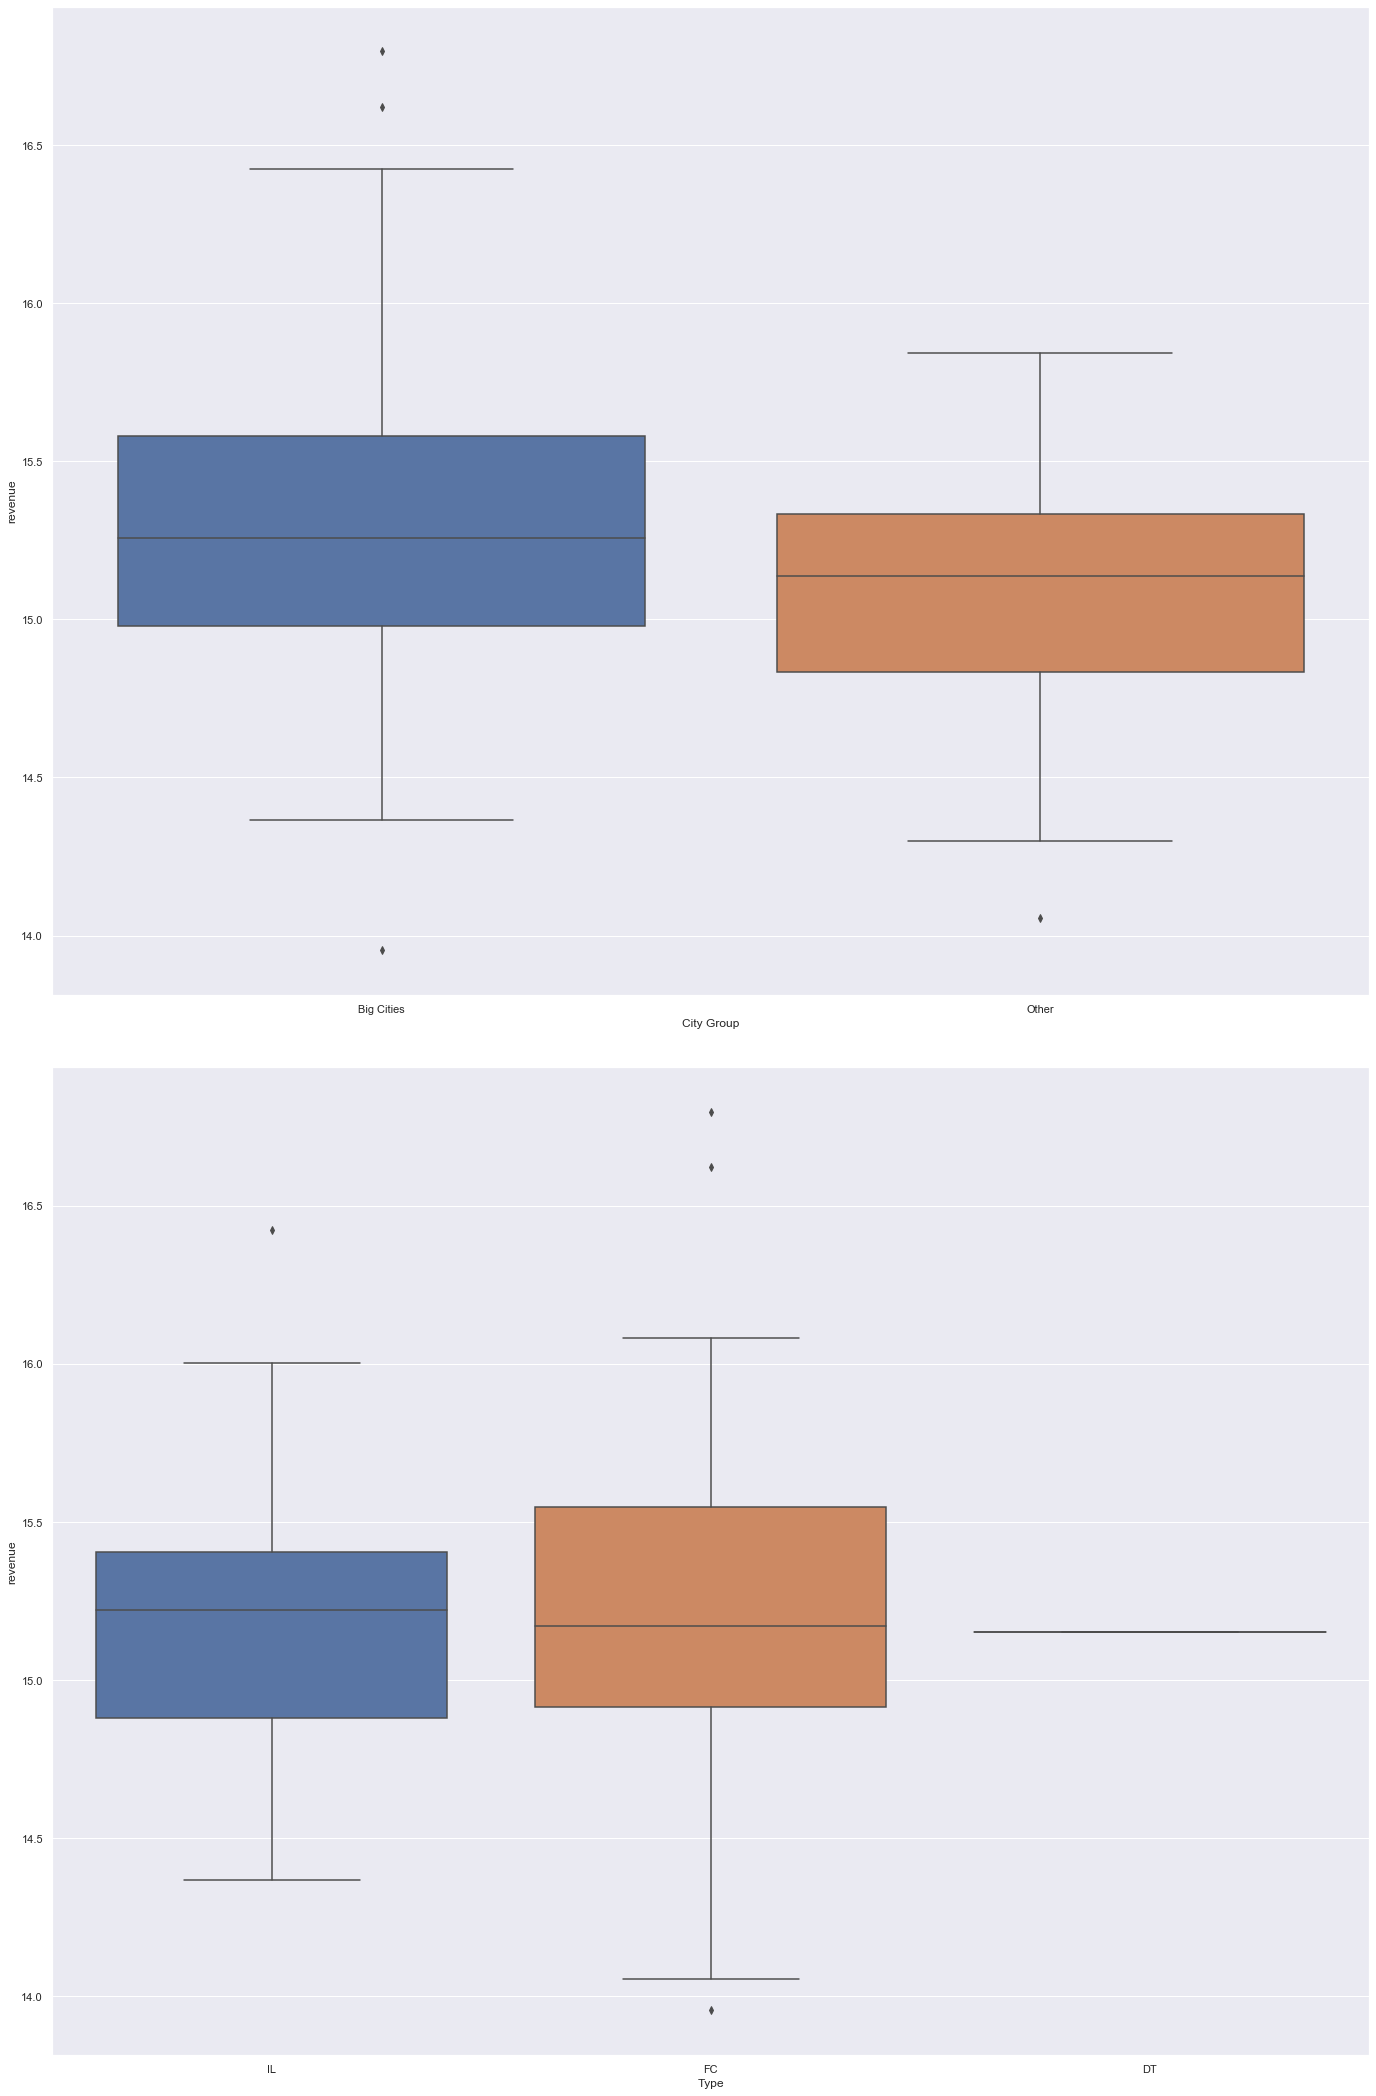

In [127]:
#店舗タイプと収益の関係
#都市の大きさと収益の関係
#3つの店舗が全体平均や偏差に影響を与えていそうで、すべてbigcity
fig, axes = plt.subplots(2,1,figsize=(20,30))
cat_feature = ['City Group','Type']
sns.set(font_scale=3)

for cat, ax in zip(cat_feature, axes):
    sns.boxplot(x=cat, y='revenue', data=train, ax=ax)
    
plt.tight_layout()

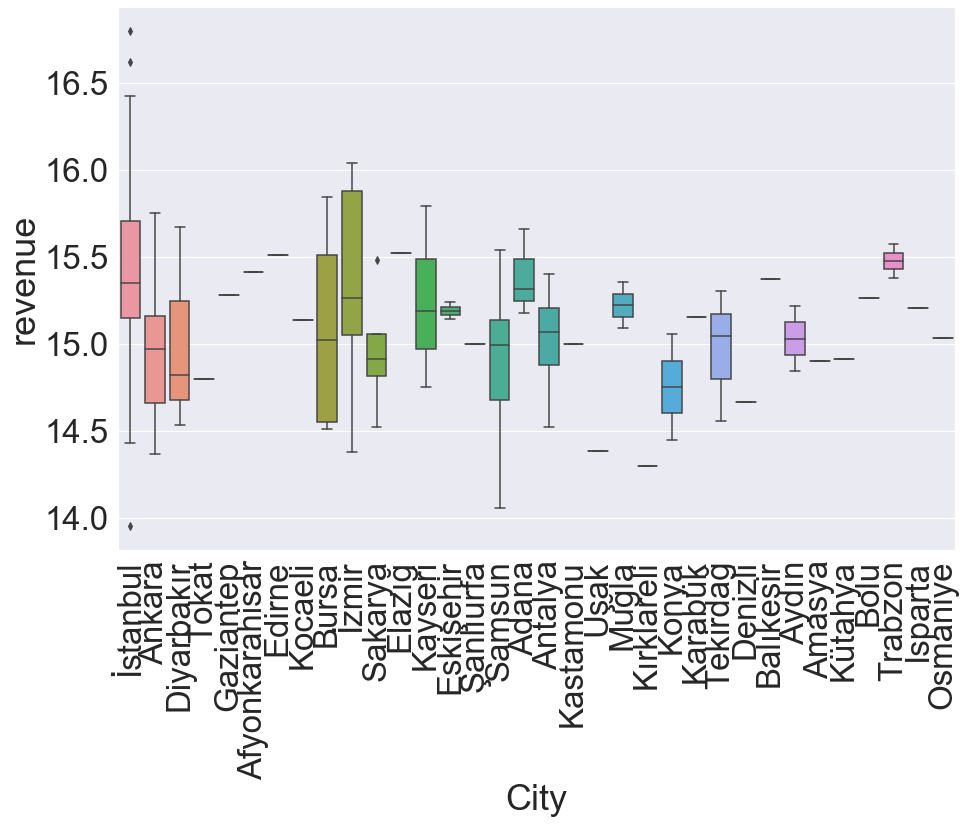

In [128]:
#都市と収益の関係
#収益が最も大きい店舗は、すべてistanbulに集中
f, ax = plt.subplots(figsize=(15,10))
plt.xticks(rotation='90')
sns.set(font_scale=1.5)
sns.boxplot(x='City', y='revenue', data=train)

In [129]:
#BigCityの第3四分位を超えた最大値の2点 およびFCの第3四分位を超えた二点は、ともにイスタンブール(2000年と2005年)
#ILの第3四分位を超えた1点も、イスタンブール(1999)
train[train['revenue'] > 16.4]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DataIs
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,16.795974,train
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,3,4,4,5,3,4.0,0,0,0,0,0,5,5,5,5,4,0,0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,16.621840,train
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,4,4,4,5,3,4.0,5,5,5,5,5,5,5,5,3,1,5,5,5.0,1.0,5.0,1.0,5,5,4,2,5,5,5,3,16.423757,train


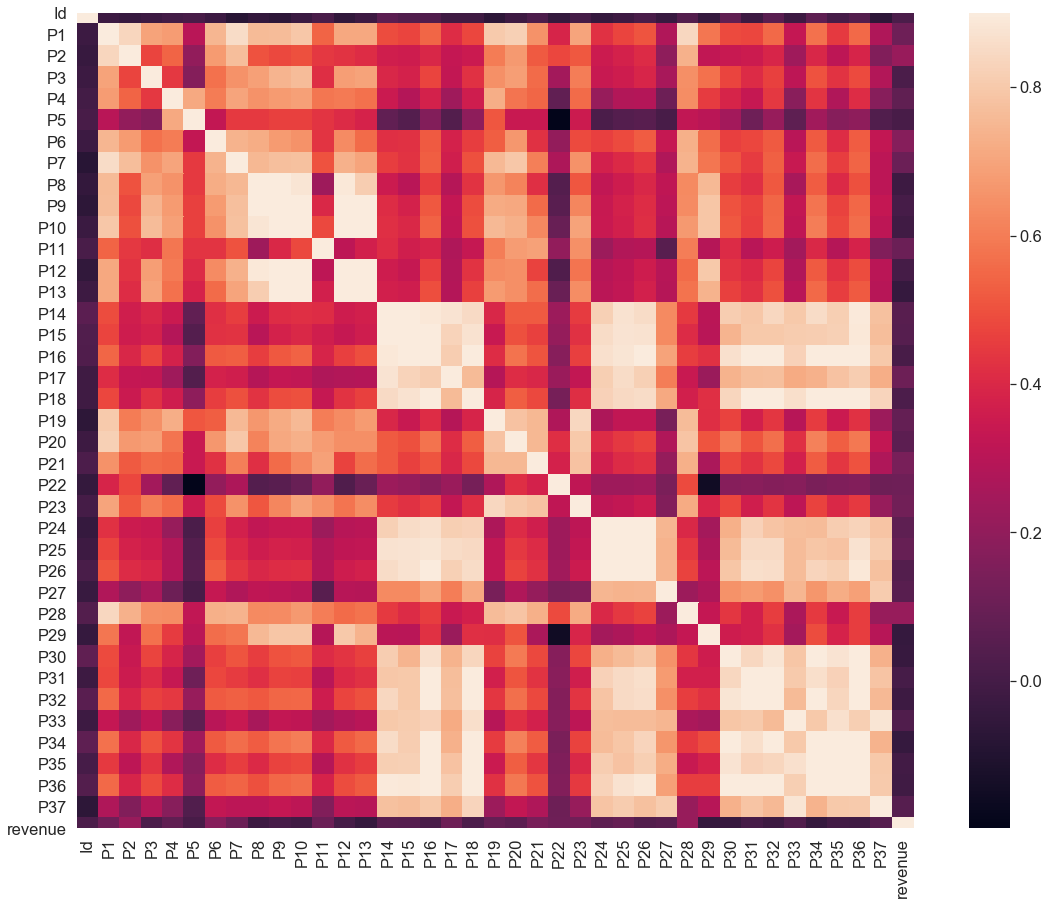

In [130]:
#収益とその他特徴量がどの程度相関の関係にあるのかヒートマップを描く
#ほとんどの特徴量が収益との相関を示していない。
#一方で、都市の地理的な様子を表現しているP１～P37の特徴量同士で強い相関がみられる部分あり
corrmat = train.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [131]:
#istanbulのrevenueが大きな3点の値を見てみる
train.query('City == "İstanbul"').sort_values('revenue', ascending=False)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DataIs
16,16,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,16.795974,train
75,75,10/15/2005,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,4,5,3,4,4,5,3,4.0,0,0,0,0,0,5,5,5,5,4,0,0,0.0,0.0,5.0,0.0,0,0,0,0,0,0,0,0,16.621840,train
99,99,12/18/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,4,5,4,4,4,5,3,4.0,5,5,5,5,5,5,5,5,3,1,5,5,5.0,1.0,5.0,1.0,5,5,4,2,5,5,5,3,16.423757,train
100,100,09/21/2007,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,5,5,5,2,5,5.0,0,0,0,0,0,4,5,2,2,1,0,0,0.0,0.0,4.0,3.0,0,0,0,0,0,0,0,0,16.082712,train
24,24,09/20/2009,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,2,5,5,5,4,2,5,4.0,4,4,4,5,4,5,5,2,2,3,2,2,2.0,5.0,3.0,2.0,5,5,4,4,4,4,5,2,16.002021,train
49,49,04/01/2008,İstanbul,Big Cities,FC,12,7.5,6.0,6.0,2,8,10,10,10,10,4,10,7.5,0,0,0,0,0,15,3,3,3,5,0,0,0.0,0.0,7.5,7.5,0,0,0,0,0,0,0,0,15.970834,train
17,17,11/08/2009,İstanbul,Big Cities,FC,2,4.0,4.0,5.0,1,3,5,4,5,5,3,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,1.0,0,0,0,0,0,0,0,0,15.921293,train
85,85,01/07/2000,İstanbul,Big Cities,FC,3,5.0,4.0,4.0,2,5,5,4,5,4,3,5,4.0,0,0,0,0,0,1,4,1,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,15.829759,train
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,15.792038,train
55,55,08/12/2008,İstanbul,Big Cities,FC,2,4.0,4.0,4.0,1,4,5,5,5,5,1,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,15.752981,train


In [132]:
#訓練データとテストデータを結合
data = pd.concat([train, test], axis=0, sort=False).reset_index(drop=True)

In [133]:
data.shape

(100137, 44)

In [134]:
#日付を文字列から時系列データに変換
data['Open Date'] = data['Open Date'].apply(lambda x : datetime.datetime.strptime(x, '%m/%d/%Y')) 

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100137 entries, 0 to 100136
Data columns (total 44 columns):
Id            100137 non-null int64
Open Date     100137 non-null datetime64[ns]
City          100137 non-null object
City Group    100137 non-null object
Type          100137 non-null object
P1            100137 non-null int64
P2            100137 non-null float64
P3            100137 non-null float64
P4            100137 non-null float64
P5            100137 non-null int64
P6            100137 non-null int64
P7            100137 non-null int64
P8            100137 non-null int64
P9            100137 non-null int64
P10           100137 non-null int64
P11           100137 non-null int64
P12           100137 non-null int64
P13           100137 non-null float64
P14           100137 non-null int64
P15           100137 non-null int64
P16           100137 non-null int64
P17           100137 non-null int64
P18           100137 non-null int64
P19           100137 non-null int64
P20  

In [136]:
numeric_feats = data.dtypes[(data.dtypes != 'object') & (data.dtypes != 'datetime64[ns]')].index
print(numeric_feats)

#すべての数値型の歪度を確認
skewed_feats = data[data['DataIs'] == 'train'][numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
print('skew in numerical features:')
skewness = pd.DataFrame({'skew':skewed_feats})
skewness

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')
skew in numerical features:


,skew
P17,3.413828
P23,3.240081
P32,2.884325
P14,2.848019
P30,2.847974
P21,2.699989
P34,2.689415
P19,2.475751
P27,2.429622
P36,2.406344


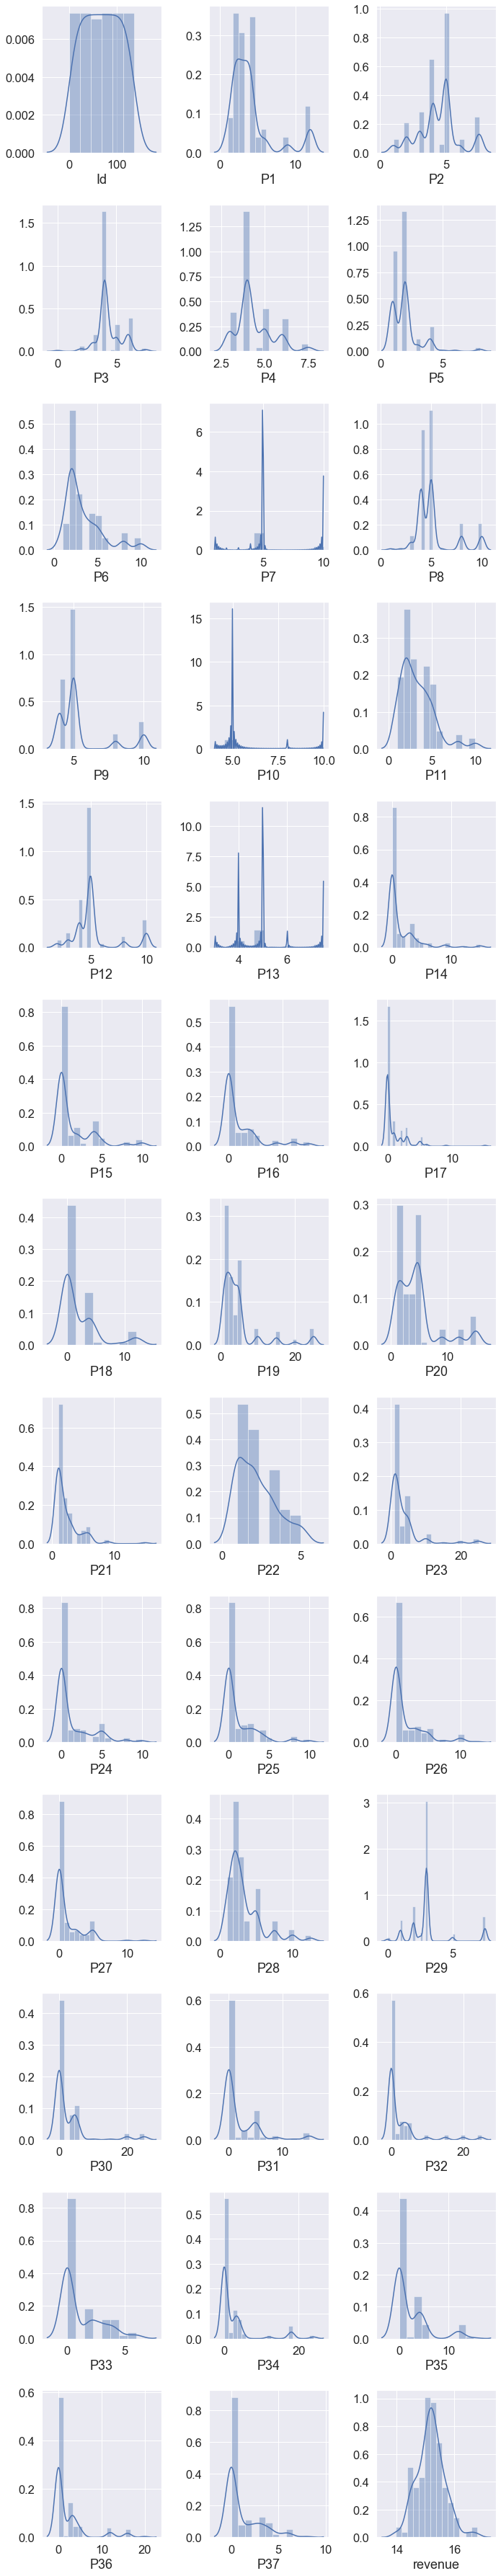

In [138]:
fig, axes = plt.subplots(13,3, figsize=(10,50))

for col, ax in zip(numeric_feats.values, axes.ravel()):
    sns.distplot(data[data['DataIs'] == 'train'][col], axlabel=col, ax=ax)
    ax.set_ylim(0)
plt.tight_layout()
plt.show()

In [139]:
#カテゴリ型変数の頻度
categoric_feat = data.dtypes[data.dtypes == 'object'].index
print(categoric_feat)

Index(['City', 'City Group', 'Type', 'DataIs'], dtype='object')


        City  total_revenue
31  İstanbul     769.757256
3     Ankara     283.859663
32     İzmir     138.108842
8      Bursa      75.433688
26    Samsun      74.403273

   City Group  total_revenue
0  Big Cities    1191.725761
1       Other     888.919664

  Type  total_revenue
1   FC    1156.027448
2   IL     909.464835
0   DT      15.153142



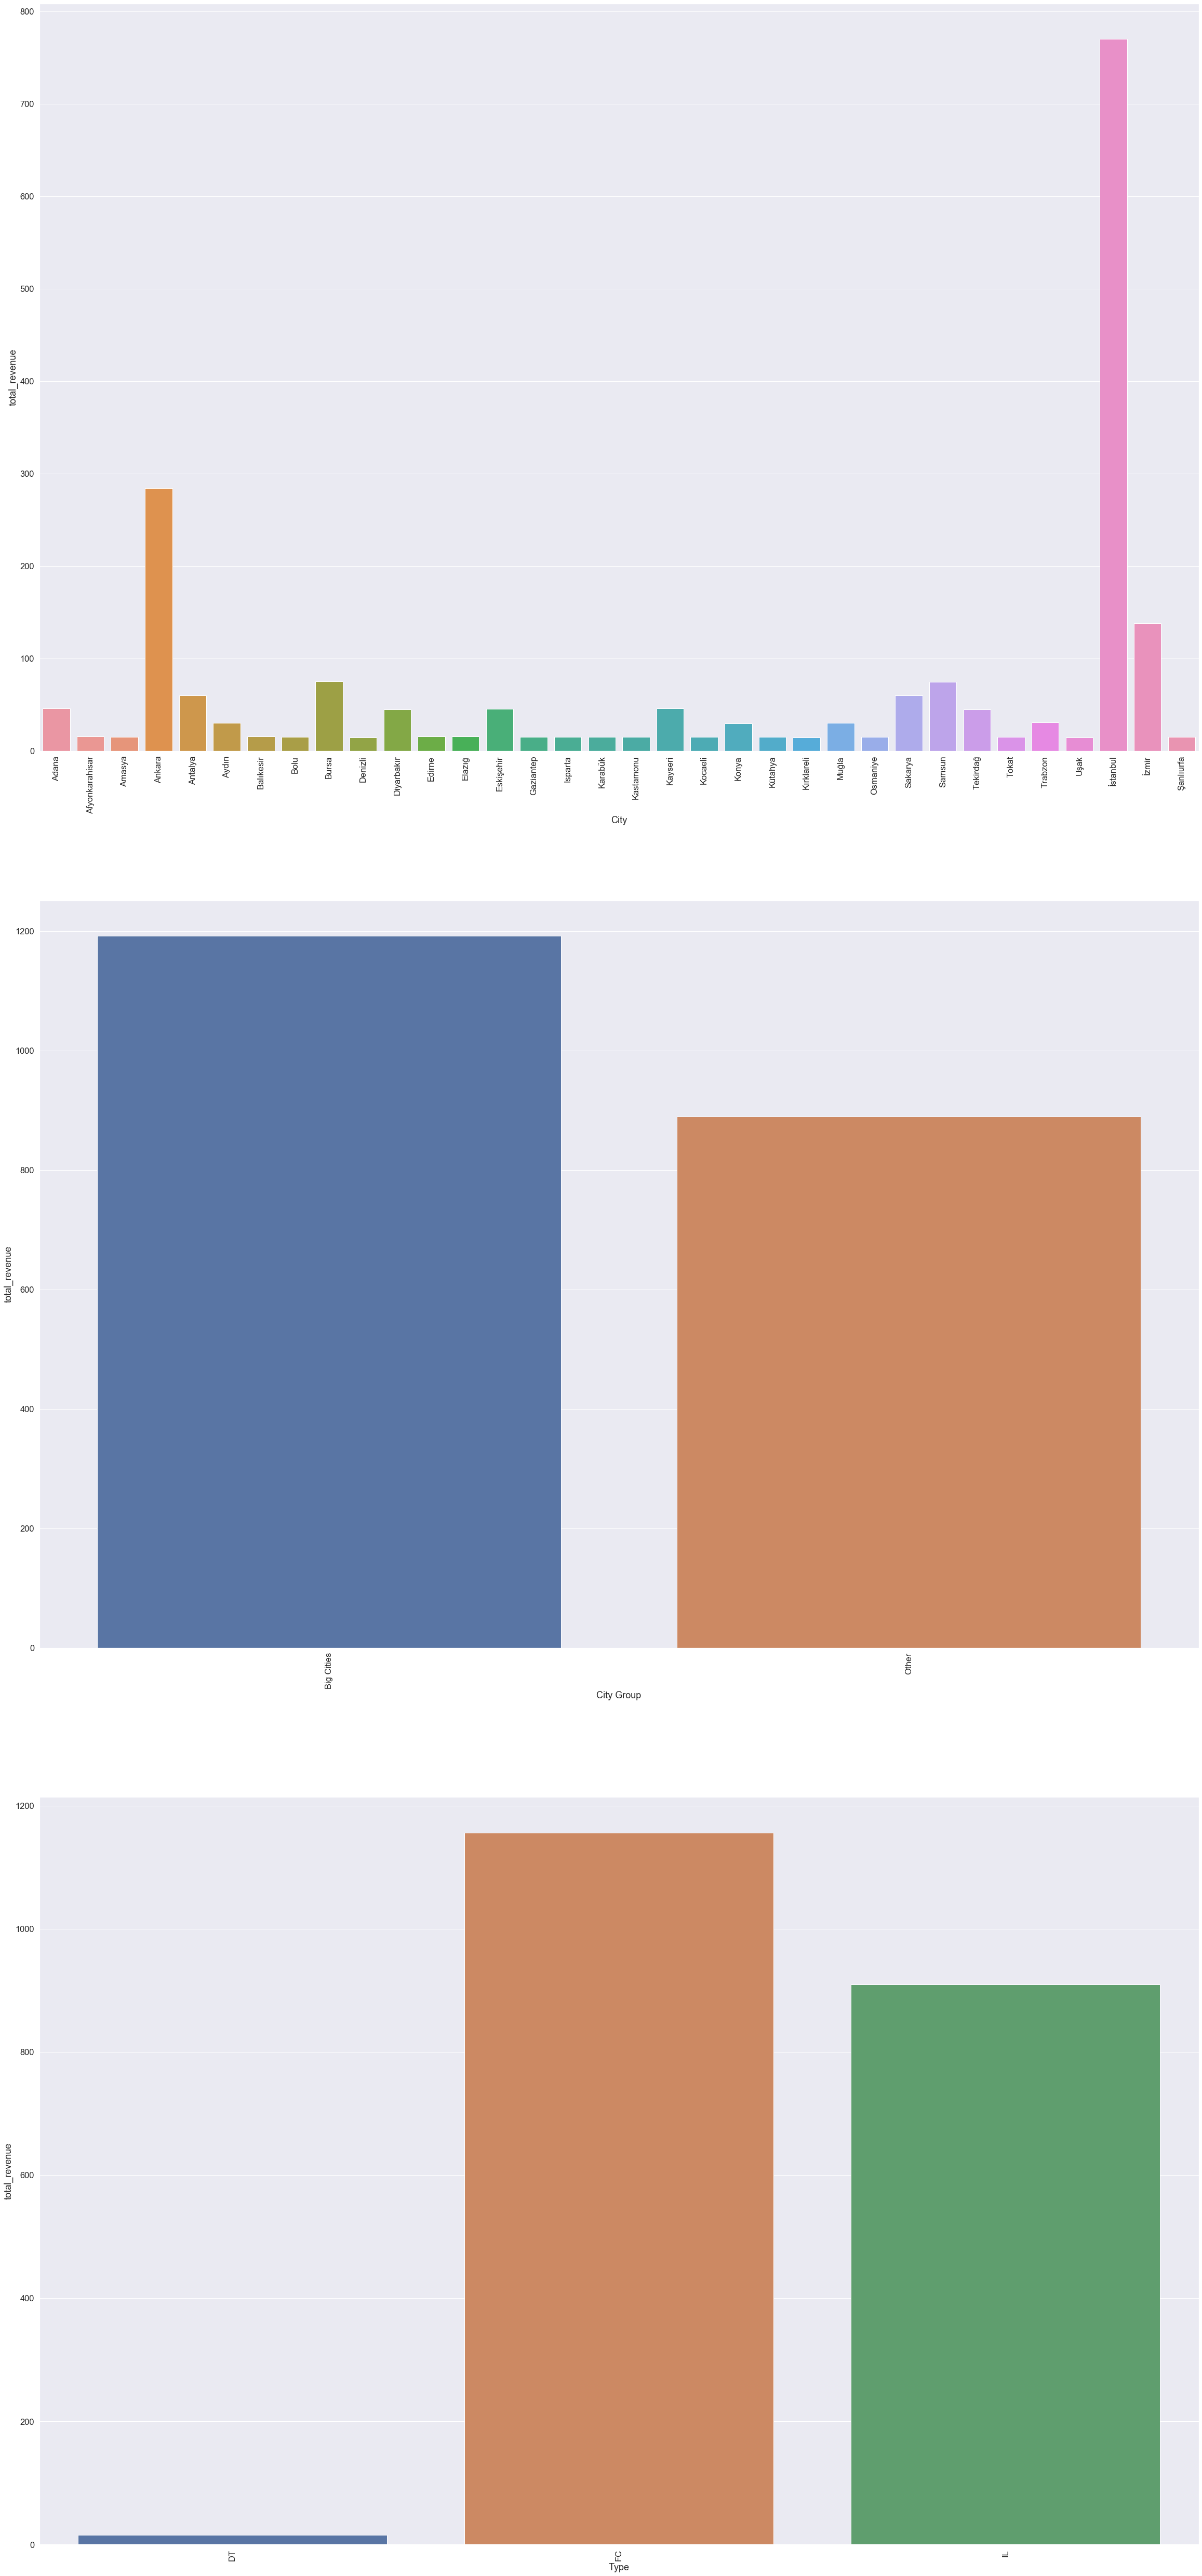

In [140]:
fig, axes = plt.subplots(3, 1, figsize=(40,90))

for col, ax in zip(categoric_feat[:3].values, axes.ravel()):
    df = data[data['DataIs'] == 'train'][[col, 'revenue']].groupby(col).revenue.sum().reset_index()
    df.columns = [col, 'total_revenue']
    sns.set(font_scale=5)
    sns.barplot(x=col, y='total_revenue', data=df, ax=ax)
    print(df.sort_values('total_revenue', ascending=False).head())
    print()
    for label in ax.get_xticklabels():
        label.set_rotation(90)
plt.show()


#収益がイスタンブールに集中している。次いでアンカラ
#収益総計はbigcityがotherを上回る
#店舗形態もFCが一番。次いでIL

In [141]:
#イスタンブールの収益上位3店舗は何らかの特別な理由による高収益の可能性がある。
#上位3店舗の売り上げを外してみる
data_2 = data.copy()
drop_index = data_2.index[(data_2['DataIs'] == 'train') & (data_2['revenue'] > 16.4)]
print(drop_index)
#data_2.drop(drop_index, inplace=True)

Int64Index([16, 75, 99], dtype='int64')


In [142]:
data_2.shape

(100137, 44)

In [143]:
data_2.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DataIs
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,15.547830,train
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,15.750379,train
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,14.535971,train
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,14.799651,train
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,15.278005,train


In [144]:
#テストデータのMBは、全体に対し数が少ない・DT(ドライブスルー)と同じく店舗型ではない
#MBをDTに置き換える
data['Type'].value_counts()

FC    57095
IL    40507
DT     2245
MB      290
Name: Type, dtype: int64

In [145]:
#テストデータのMBは、全体に対し数が少ない・DT(ドライブスルー)と同じく店舗型ではない
#MBをDTに置き換える

data_2.loc[data_2['Type']=='MB', 'Type'] = 'DT'

In [146]:
data_2['Type'].value_counts()

FC    57095
IL    40507
DT     2535
Name: Type, dtype: int64

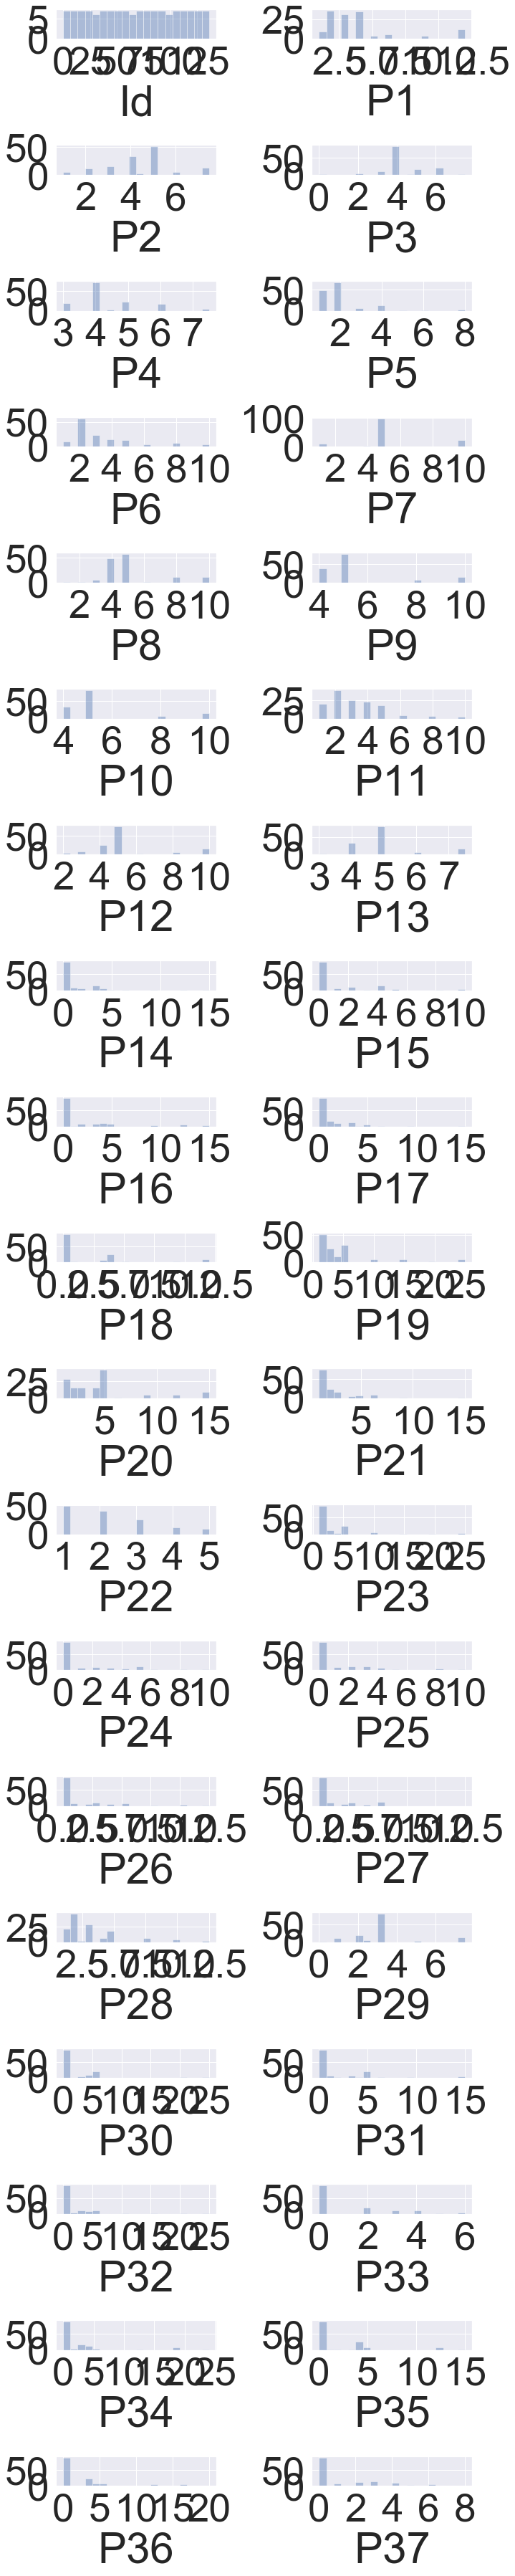

In [147]:
#訓練データのP１～P37について、0値の頻度を見る
fig, axes = plt.subplots(19,2, figsize=(10,50))

for col, ax in zip(numeric_feats.values, axes.ravel()):
    sns.distplot(data_2[data_2['DataIs'] == 'train'][col], axlabel=col, 
                 bins=20, ax=ax, kde=False)
sns.set(font_scale=1)
plt.tight_layout()
plt.show()

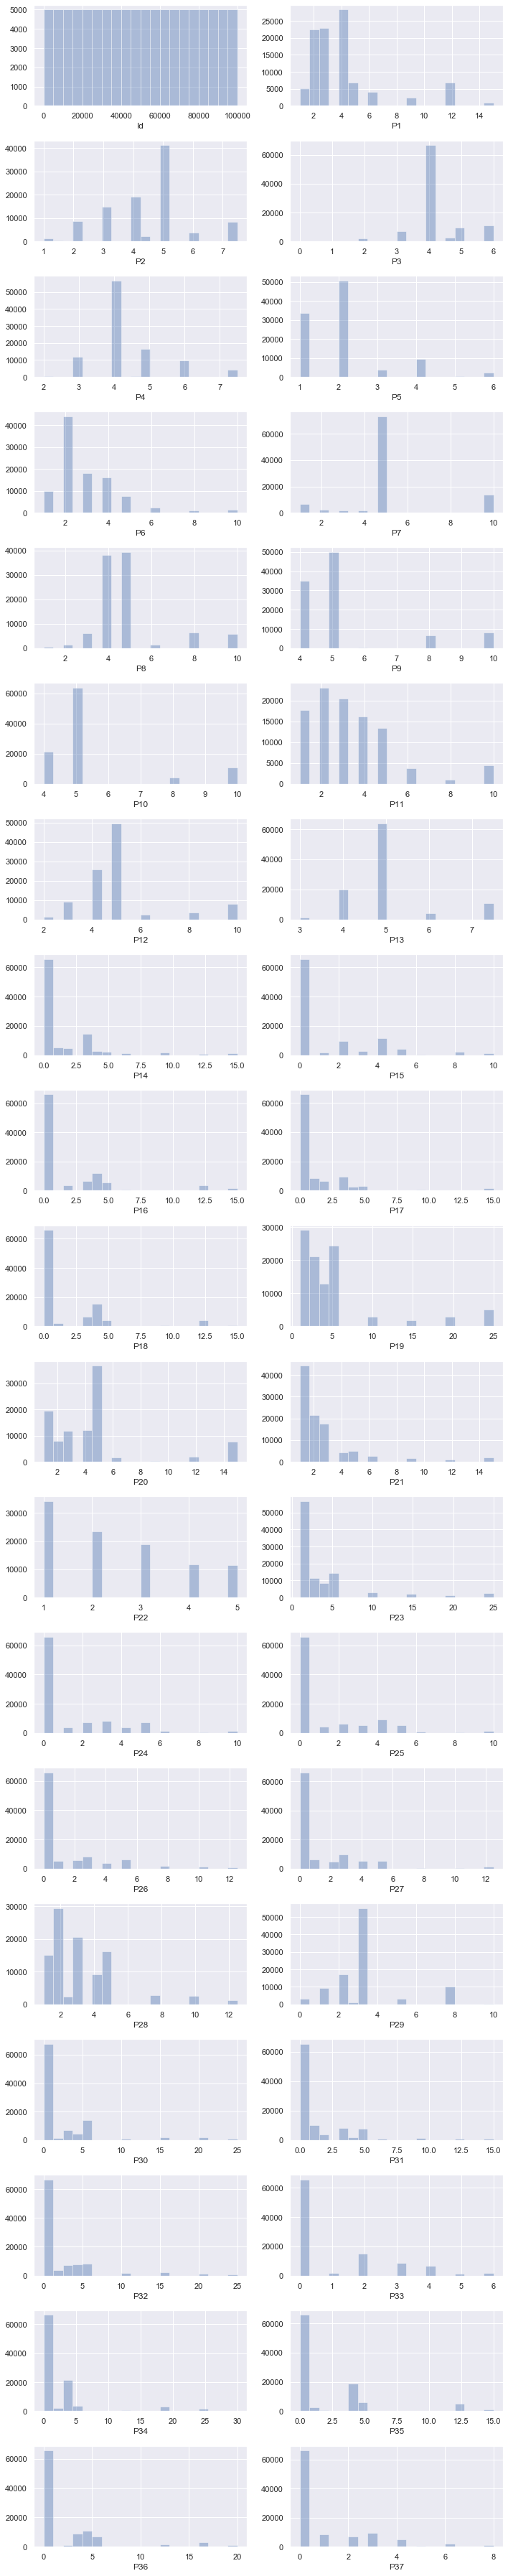

In [148]:
#テストデータのP１～P37について、0値の頻度を見る
fig, axes = plt.subplots(19,2, figsize=(10,50))

for col, ax in zip(numeric_feats.values, axes.ravel()):
    sns.distplot(data_2[data_2['DataIs'] == 'test'][col], axlabel=col, 
                 bins=20, ax=ax, kde=False)
sns.set(font_scale=1)
plt.tight_layout()
plt.show()

- データの説明：不動産データは、主に立地のm2、立地の正面、駐車場の有無に関連するものです。
- 商業データは主に、学校、銀行、他のQSRオペレーターを含む関心のあるポイントの存在を含んでいます。
- P1～P37について、それぞれカテゴリ変数が割り振られており、存在の有無や個数などで数値が入れられている可能性
- ゆえに、値0は「存在しない」もしくは、欠損値nullである可能性あり
- nullとして扱うとき、欠損値補完にはmissforestを用いたが、結果としてスコアが悪化した
- よって、0は「存在しない」を意味する特徴量として使用
- MCAR：完全にランダムに欠損、
- MAR：ランダムに欠損するかしないかは観測値に依存するが欠損値には依存しない
- MNAR：欠損値に依存して欠損する
- 実際のデータに基づくため、ランダム欠損ではないのでは、という仮定

In [149]:
#都市規模と店舗型の売り上げ割合
pd.crosstab([train['City Group'], train['Type']], train['revenue'].sum(), margins=True, normalize=True)
#Bigcity,other全体の30%近くがFC:フランチャイズ、次いで20%がIL：埋め込み型(おそらく繁華街沿いの店)
#DTドライブスルーは少ない
#BigCityもOtherも一番収益多いのはFC。
#仮説：FCに出店すればいいのではないか

col_0            2080.645424669525       All
City Group Type                             
Big Cities DT             0.007299  0.007299
           FC             0.284672  0.284672
           IL             0.277372  0.277372
Other      FC             0.270073  0.270073
           IL             0.160584  0.160584
All                       1.000000  1.000000

C:\Users\odash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


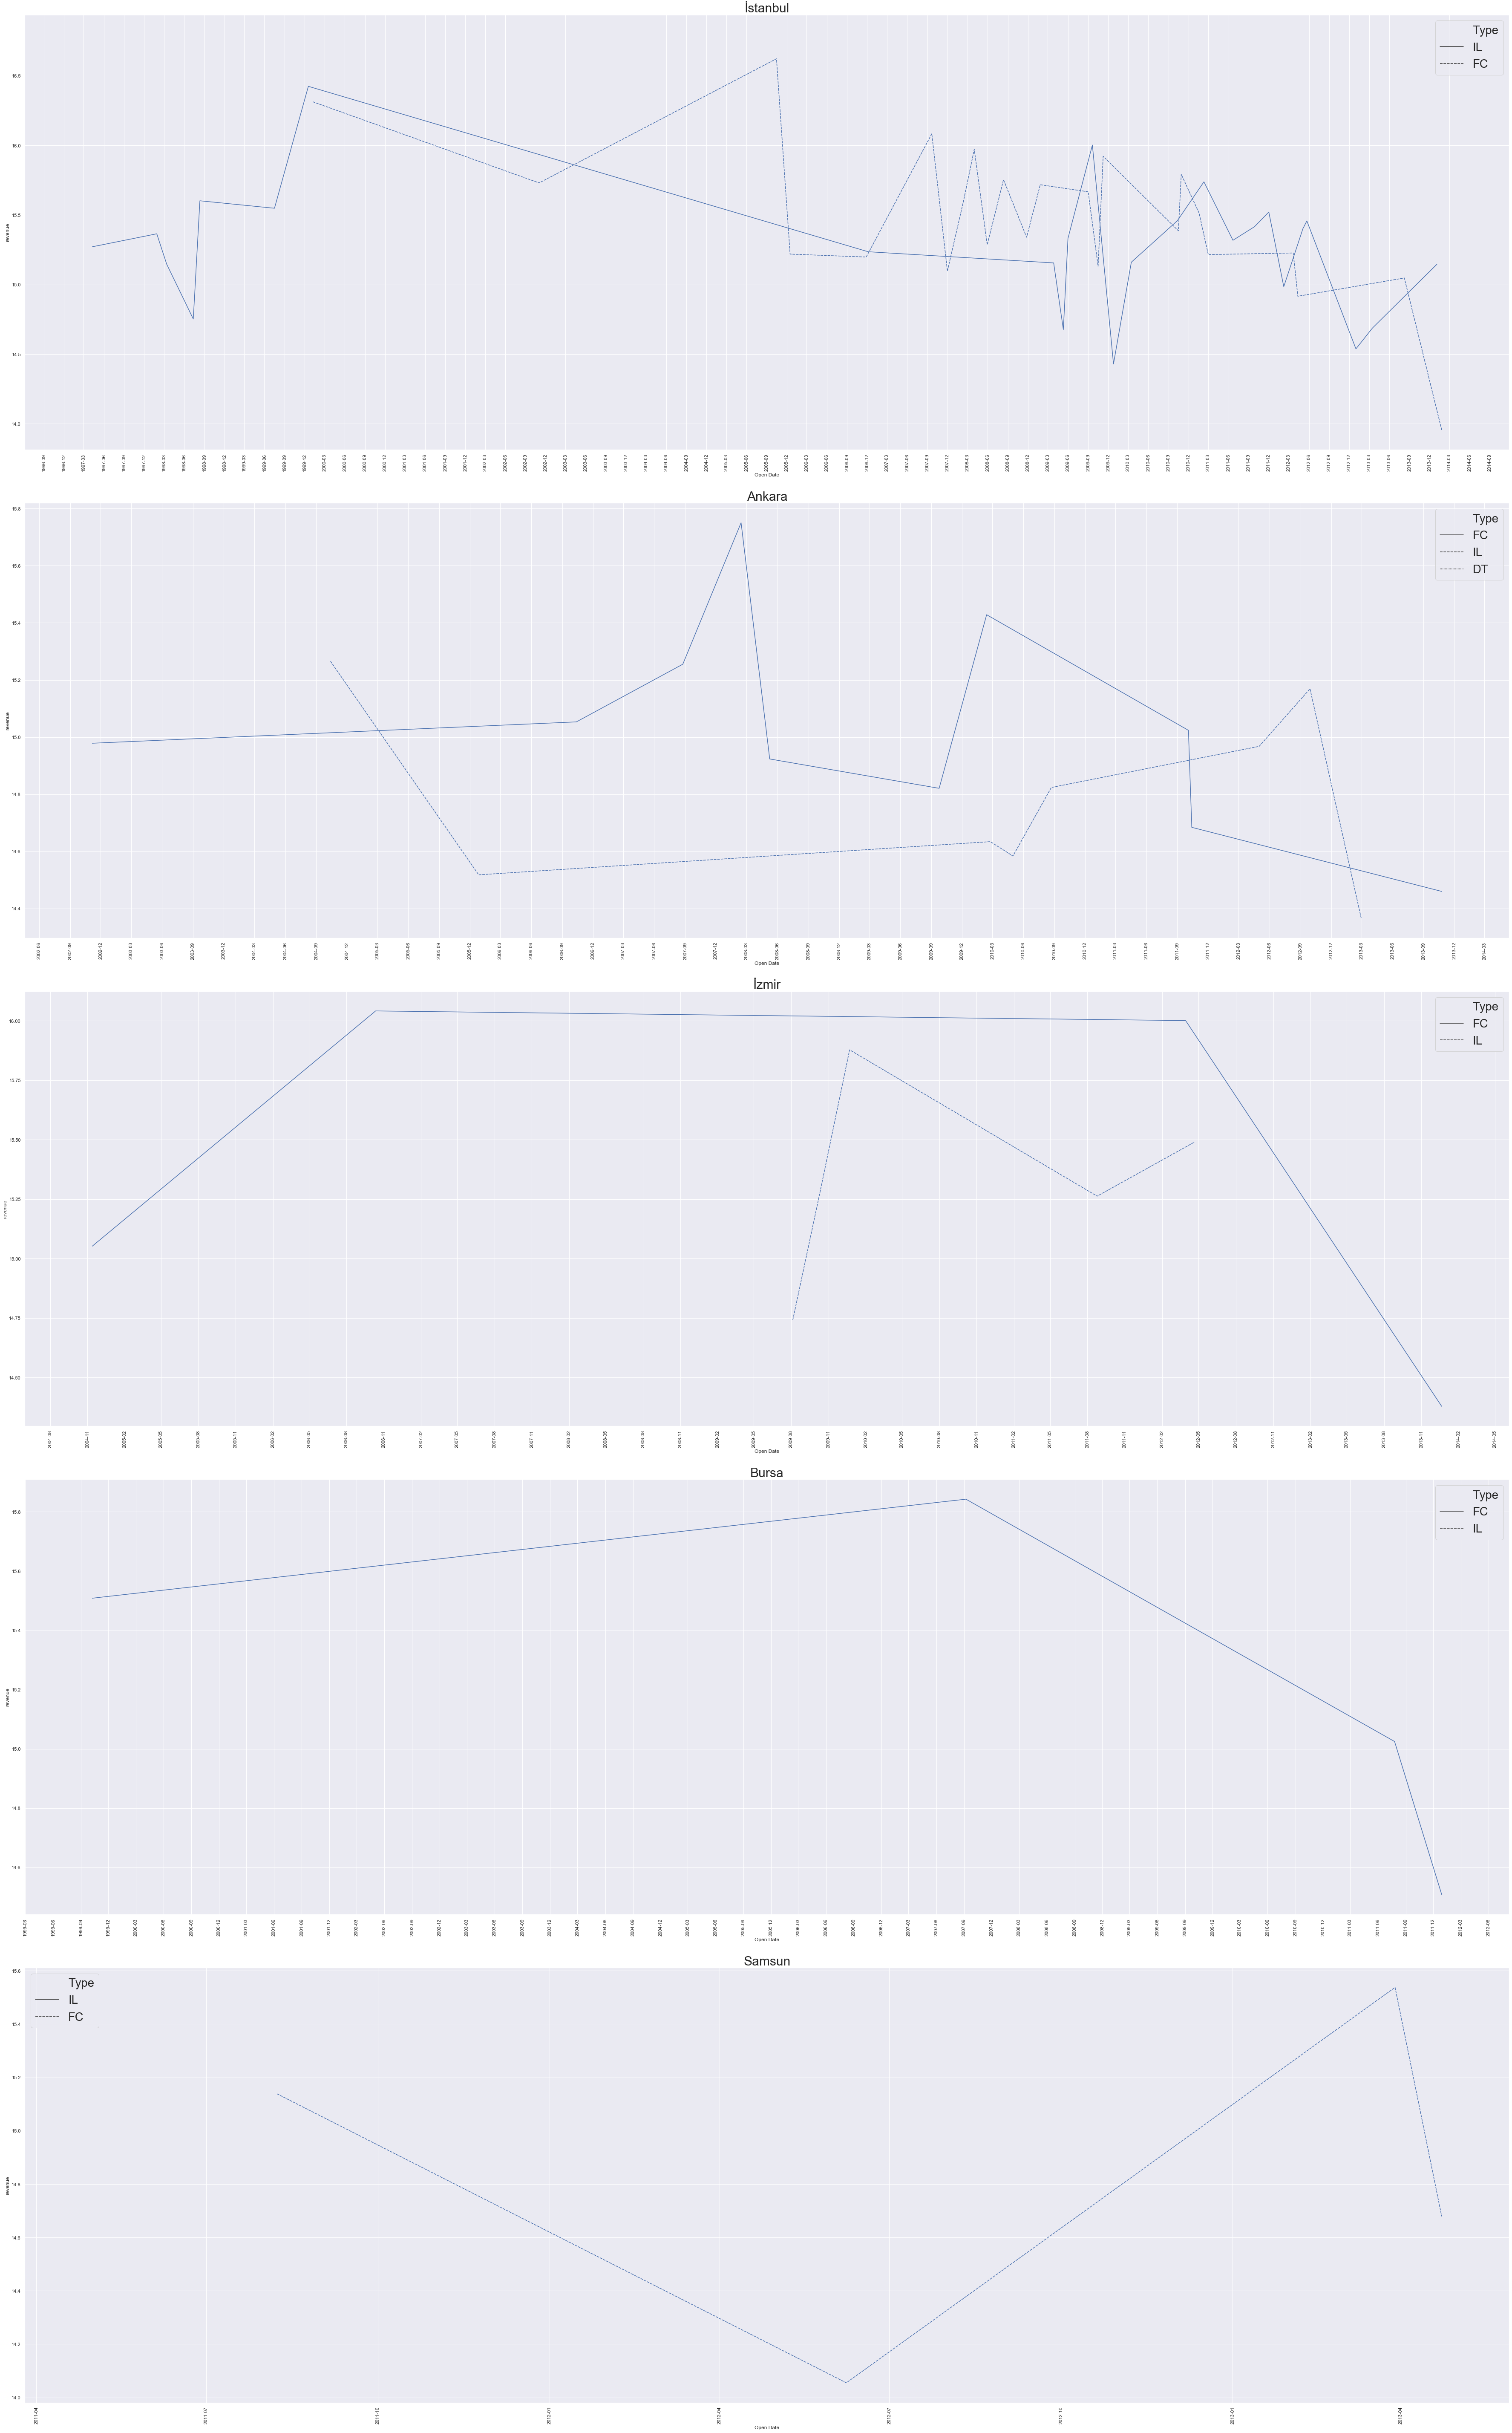

In [150]:
#売上上位5都市について、FCとILのオープン日を比較し、収益に差があるのかを見る
import matplotlib.dates as mdates
top5 = ['İstanbul', 'Ankara', 'İzmir', 'Bursa', 'Samsun']
fig, axes = plt.subplots(5, 1, figsize=(50,80))
sns.set(font_scale=2.5)
for city, ax in zip(top5, axes.ravel()):
    x = data_2[data_2['City'] == city][data_2['DataIs'] == 'train']
    x = x.sort_values(by=['Open Date'])
    sns.lineplot(x='Open Date', y='revenue', style='Type', data=x, ax=ax)
    ax.set_title(city)
    dates = mdates.MonthLocator(interval=3)
    dates_fmt = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_locator(dates)
    ax.xaxis.set_major_formatter(dates_fmt)
    plt.setp(ax.get_xticklabels(), rotation=90)

plt.legend(loc='upper left')       
plt.tight_layout()
#イスタンブールのデータを見ると、2007年からFCの出店が増えている。2009年からは繁華街店も増えてきた
#FCとILの収益は2011年から下がりつつあるように見える
#2007年からのイスタンブールの出店頻度が一番多い
#全体として、FCは2010-11年以降は収益の減少傾向に。ILも同様
#ただ、直近の収益はILがある上位3都市のうち2都市でILがFCを上回っている。
#ILを出店するのが良いか。
#収益が高い出店月に明確な規則性は見えにくい。逆に、収益が少ない月(グラフの下に凸のもの)は12-3月が比較的多いので避けるのが良いかか

In [151]:
#変数Pについて考える
#P1からP37はその土地の情報を数値化したものであるため、
#土地ごとの平均値を算出し、0値の影響を見る
distinct_cities = train['City'].unique()

means = []
for col in train.columns[5:42]:
    temp = []
    for city in distinct_cities:
        temp.append(train.loc[train['City'] == city, col].mean())
    means.append(temp)
    
city_pvars = pd.DataFrame(columns=['city','city_var', 'means'])
for i in range(37):
    for j, city in enumerate(distinct_cities):
        city_pvars.loc[i+37*j] = [city, 'P'+str(i+1), means[i][j]]

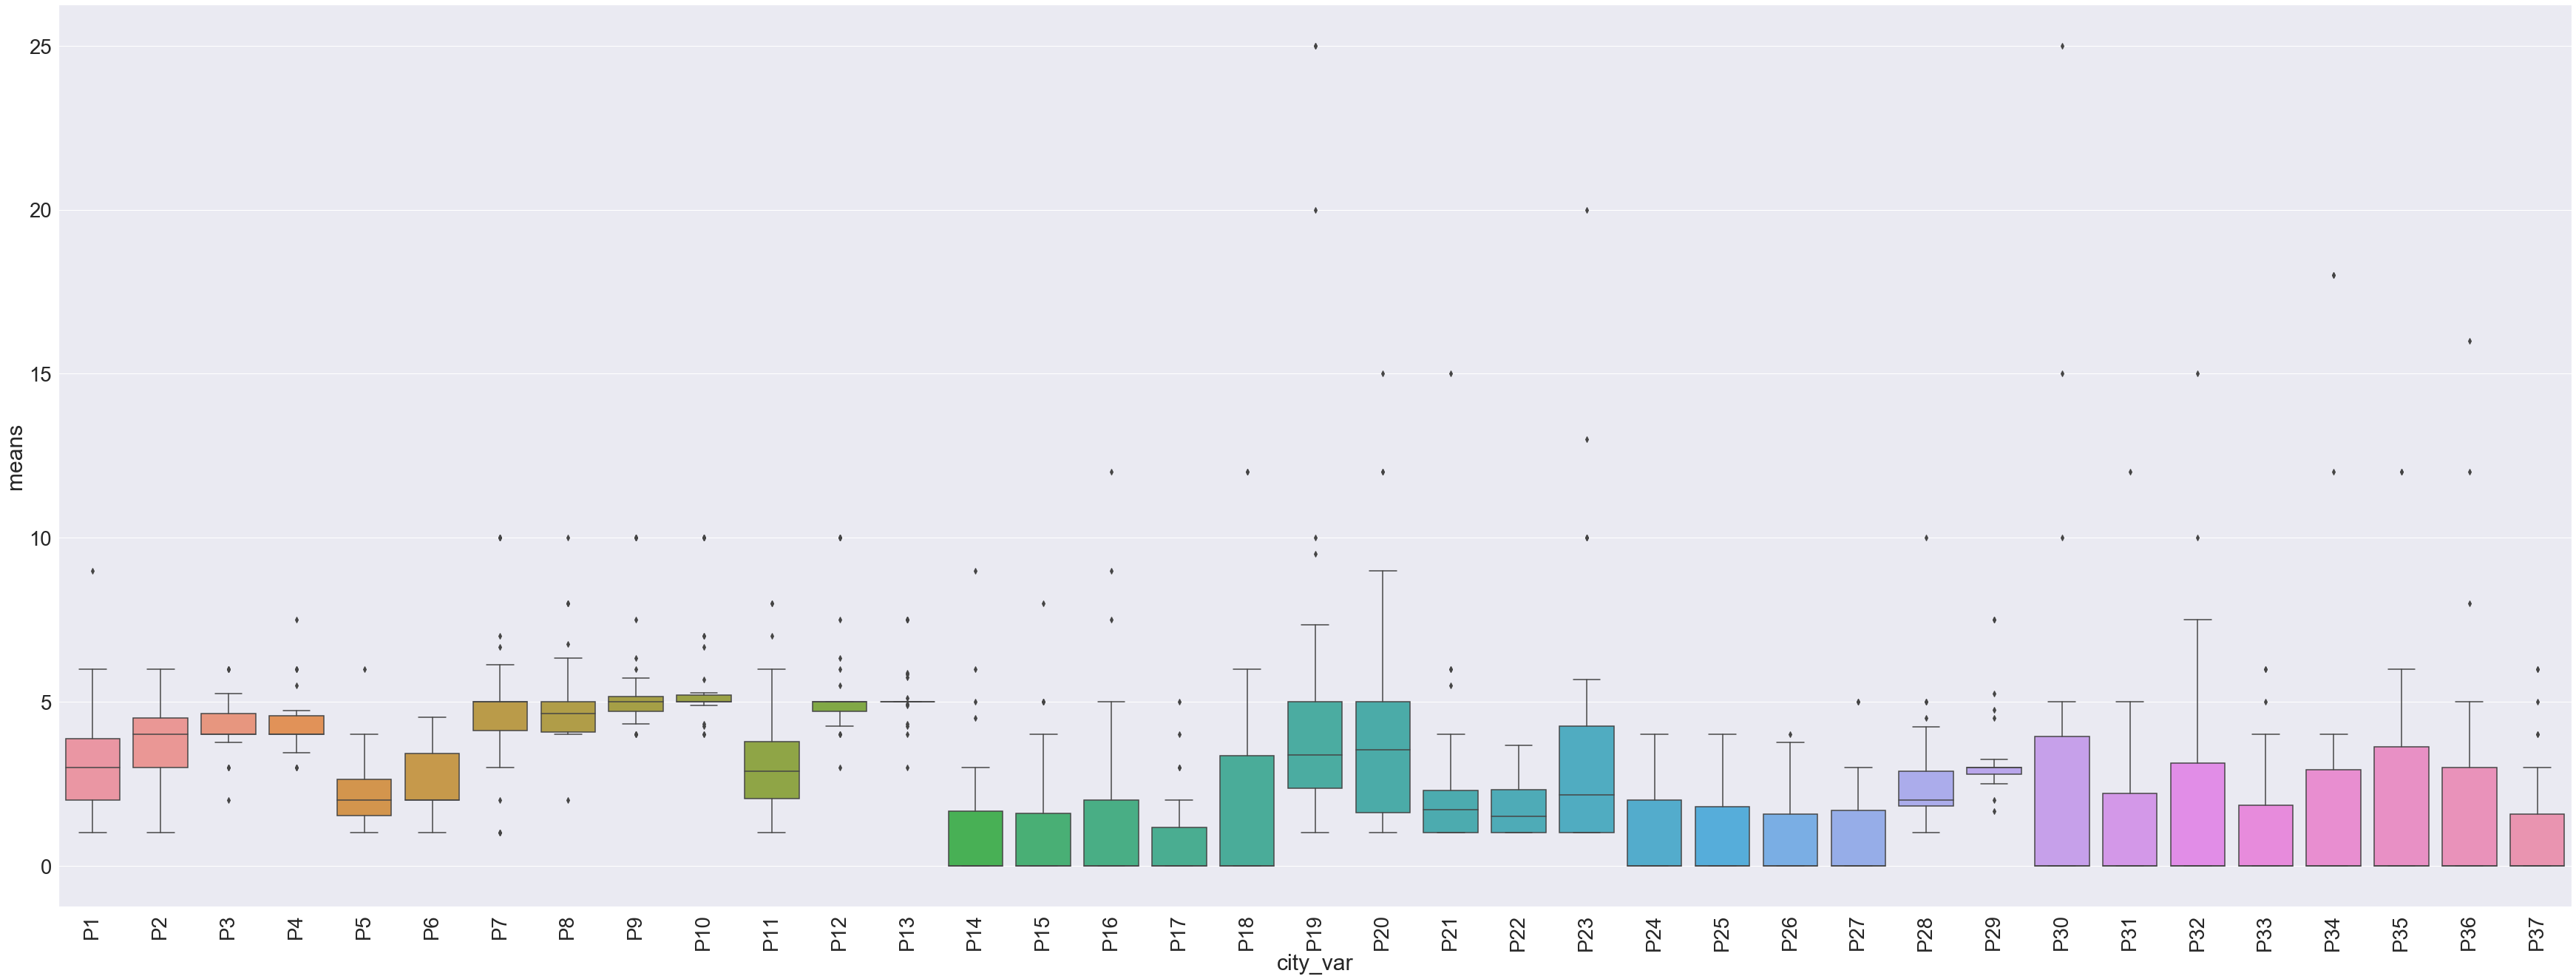

In [152]:
#箱ひげ図で見てみる
#値が0を含む値が多く存在し、四分位範囲から外れる点が存在。ばらつきの大きさがうかがえる
fig, axes = plt.subplots(figsize=(50,20))
sns.set(font_scale=5)
plt.setp(axes.get_xticklabels(), rotation=90)
sns.boxplot(x='city_var', y='means', data=city_pvars)
plt.tight_layout()

In [153]:
#カテゴリ変数をダミー変数化する
category = pd.get_dummies(data_2[['City Group','Type']])

In [154]:
#元のデータとダミー変数化したデータを結合する
n_data = pd.concat([data_2,category], axis=1)

In [155]:
n_data.shape

(100137, 49)

In [156]:
n_data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DataIs,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,15.547830,train,1,0,0,0,1
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,15.750379,train,1,0,0,1,0
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,14.535971,train,0,1,0,0,1
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,14.799651,train,0,1,0,0,1
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,15.278005,train,0,1,0,0,1


In [157]:
#最新の日付がいつなのかを確認
#2014年1月25日であった
n_data.sort_values(by='Open Date', axis=0, ascending=False)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,DataIs,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
21,21,2014-01-25,İstanbul,Big Cities,FC,5,5.0,4.0,4.0,2,2,5,4,4,4,4,3,4.0,0,0,0,0,0,4,5,1,3,1,0,0,0.0,0.0,3.0,1.0,0,0,0,0,0,0,0,0,1.395516e+01,train,1,0,0,1,0
6240,6103,2014-01-04,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,1,3,5,5,5,5,2,5,5.0,0,0,0,0,0,5,4,1,3,4,0,0,0.0,0.0,2.0,2.0,0,0,0,0,0,0,0,0,1.000000e+10,test,1,0,0,0,1
1602,1465,2014-01-04,İstanbul,Big Cities,FC,3,5.0,5.0,4.0,1,3,5,5,5,5,4,5,4.0,0,0,0,0,0,2,4,1,3,1,0,0,0.0,0.0,5.0,1.0,0,0,0,0,0,0,0,0,1.000000e+10,test,1,0,0,1,0
6525,6388,2014-01-04,İstanbul,Big Cities,IL,4,5.0,4.0,3.0,1,4,5,5,5,5,1,5,5.0,0,0,0,0,0,1,2,1,3,1,0,0,0.0,5.0,3.0,2.0,0,0,0,0,0,0,0,0,1.000000e+10,test,1,0,0,0,1
45821,45684,2014-01-04,Adana,Other,DT,4,5.0,4.0,5.0,1,4,5,5,4,4,2,5,5.0,0,4,3,0,0,5,5,5,5,3,5,0,0.0,0.0,5.0,2.0,0,1,0,2,0,0,4,2,1.000000e+10,test,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89731,89594,1995-05-08,Konya,Other,IL,4,5.0,4.0,4.0,1,5,5,5,5,5,1,5,5.0,3,2,3,1,5,2,5,1,3,1,1,0,1.0,1.0,2.0,3.0,4,3,2,1,3,5,3,1,1.000000e+10,test,0,1,0,0,1
97231,97094,1995-05-08,İstanbul,Big Cities,IL,2,5.0,4.0,5.0,1,1,5,4,4,5,3,5,5.0,0,2,4,4,5,2,1,4,3,1,3,0,0.0,3.0,4.0,3.0,0,1,2,0,1,0,3,0,1.000000e+10,test,1,0,0,0,1
66189,66052,1995-05-08,İstanbul,Big Cities,IL,2,4.0,5.0,4.0,2,5,5,2,4,5,2,3,5.0,4,5,3,2,4,1,5,2,3,1,3,5,2.0,3.0,2.0,3.0,3,3,2,1,1,5,3,3,1.000000e+10,test,1,0,0,0,1
98376,98239,1995-05-08,Şanlıurfa,Other,IL,4,5.0,5.0,3.0,1,5,5,5,5,5,2,5,5.0,3,5,3,5,5,1,1,4,3,1,5,5,5.0,3.0,1.0,3.0,4,1,2,1,1,5,3,1,1.000000e+10,test,0,1,0,0,1


In [158]:
#固定した日にちからの差を見る
#最新データが2014年1月25日のため、仮にコンペ開催年の2015年1月1日と比較する。
#日数の差が表示される。1000で割って桁数を他の特徴量の大きさにそろえる
n_data['days_from_open'] = n_data['Open Date']. \
       apply(lambda x: ((datetime.datetime(2015, 1, 1) - x).days)/1000)


In [159]:
n_data.drop('Open Date', axis=1, inplace=True)

In [160]:
n_data.shape

(100137, 49)

Text(0, 0.5, 'cluster distance')

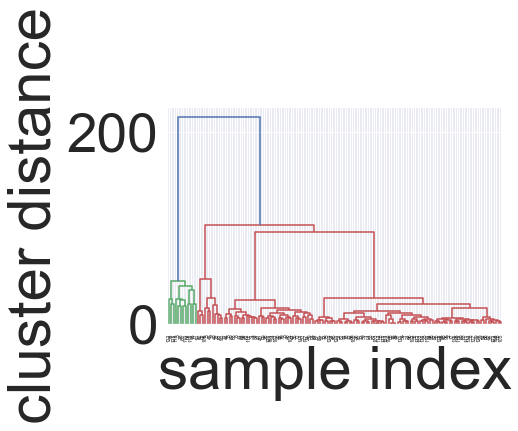

In [161]:
#都市のクラスタリングを行う
#都市名は種類が多いため、ある程度のクラスタにまとめたい
#何個のクラスタリングが良いかをデンドログラムを書いて考えてみる
from scipy.cluster.hierarchy import dendrogram, ward
columns = ['P' + str(i) for i in range(1,38)]
X = n_data[n_data['DataIs'] == 'train'][columns]
y = n_data[n_data['DataIs'] == 'train']['revenue']

linkage_array = ward(X)

dendrogram(linkage_array)
plt.xlabel('sample index')
plt.ylabel('cluster distance')

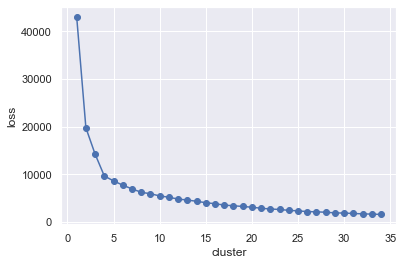

In [162]:
#P1～P37の数値を用いて、都市をクラスタリングしたい。
# しかし、どの程度のクラスタがいいのかわからないので、エルボー図を見てみる
#損失関数は大きな値をとる
#デンドログラムとエルボー図から、クラスタ数15くらいがいいか？と予想
from sklearn.cluster import KMeans

inertia = []
sns.set(font_scale=1)
p_train = n_data[n_data['DataIs'] == 'train'].loc[:,'P1':'P37']

for i in range(1,35):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300)
    km.fit(p_train)
    inertia.append(km.inertia_)

plt.xlabel('cluster')
plt.ylabel('loss')
plt.plot(range(1,35), inertia, marker='o')
plt.show()

In [165]:
#k-means法により、都市を15のクラスタにまとめる
#新たな特徴量「city cluster」を追加
km = KMeans(n_clusters=15)
p_train = data_2[data_2['DataIs'] == 'train'].loc[:,'P1':'P37']
km.fit(p_train)

n_data['City Cluster'] = km.predict(n_data.loc[:,'P1':'P37'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

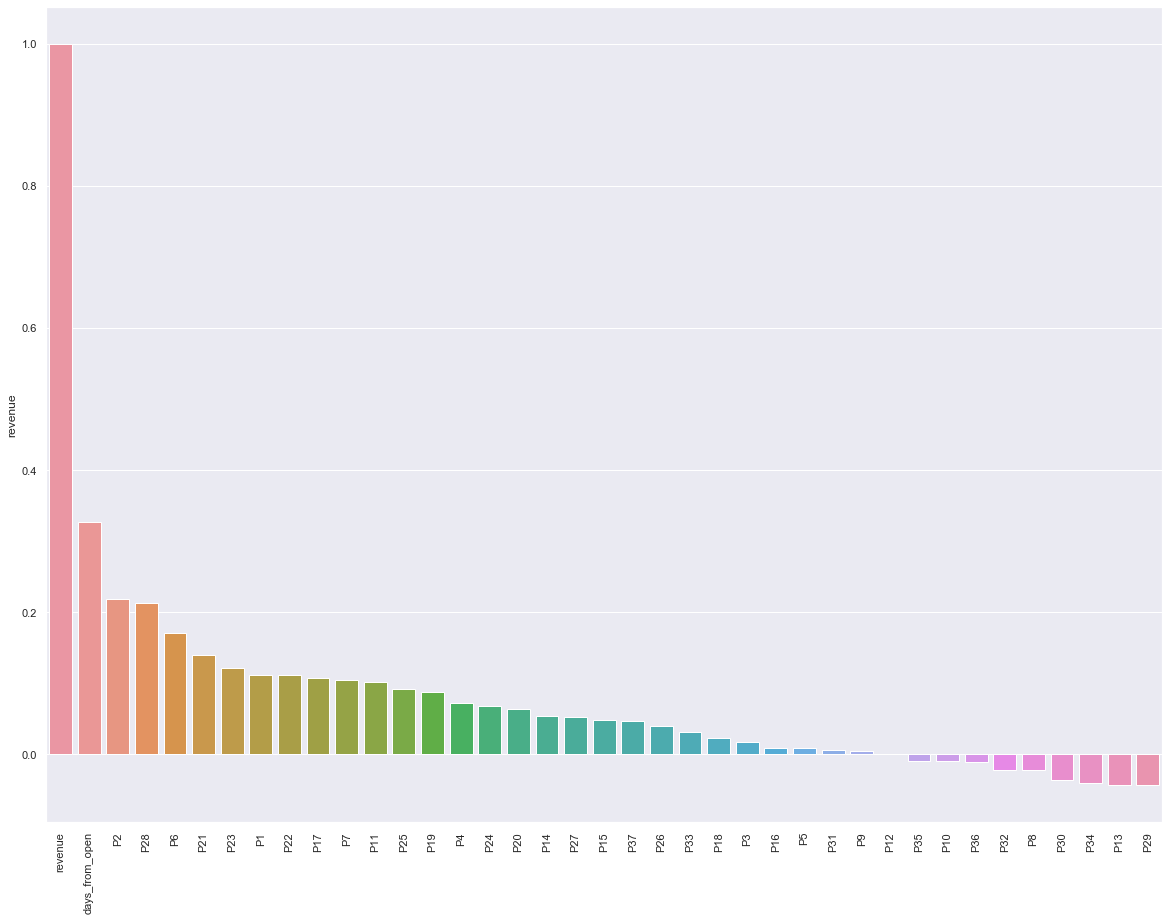

In [166]:
#収益と、日付及びP1～P37の特徴量の相関についてみる
#日付が一番高い相関を持つが、全体として低い
columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12',
          'P13','P14','P15','P16','P17','P18','P19','P20','P21','P22','P23','P24',
          'P25','P26','P27','P28','P29','P30','P31','P32','P33','P34','P35','P36',
          'P37','days_from_open','revenue']

corrmat = n_data[n_data['DataIs'] == 'train'][columns].corr().sort_values('revenue',ascending=False)
plt.subplots(figsize=(20,15))
sns.barplot(x=corrmat.index, y=corrmat['revenue'])
sns.set(font_scale=1)
plt.xticks(rotation=90)

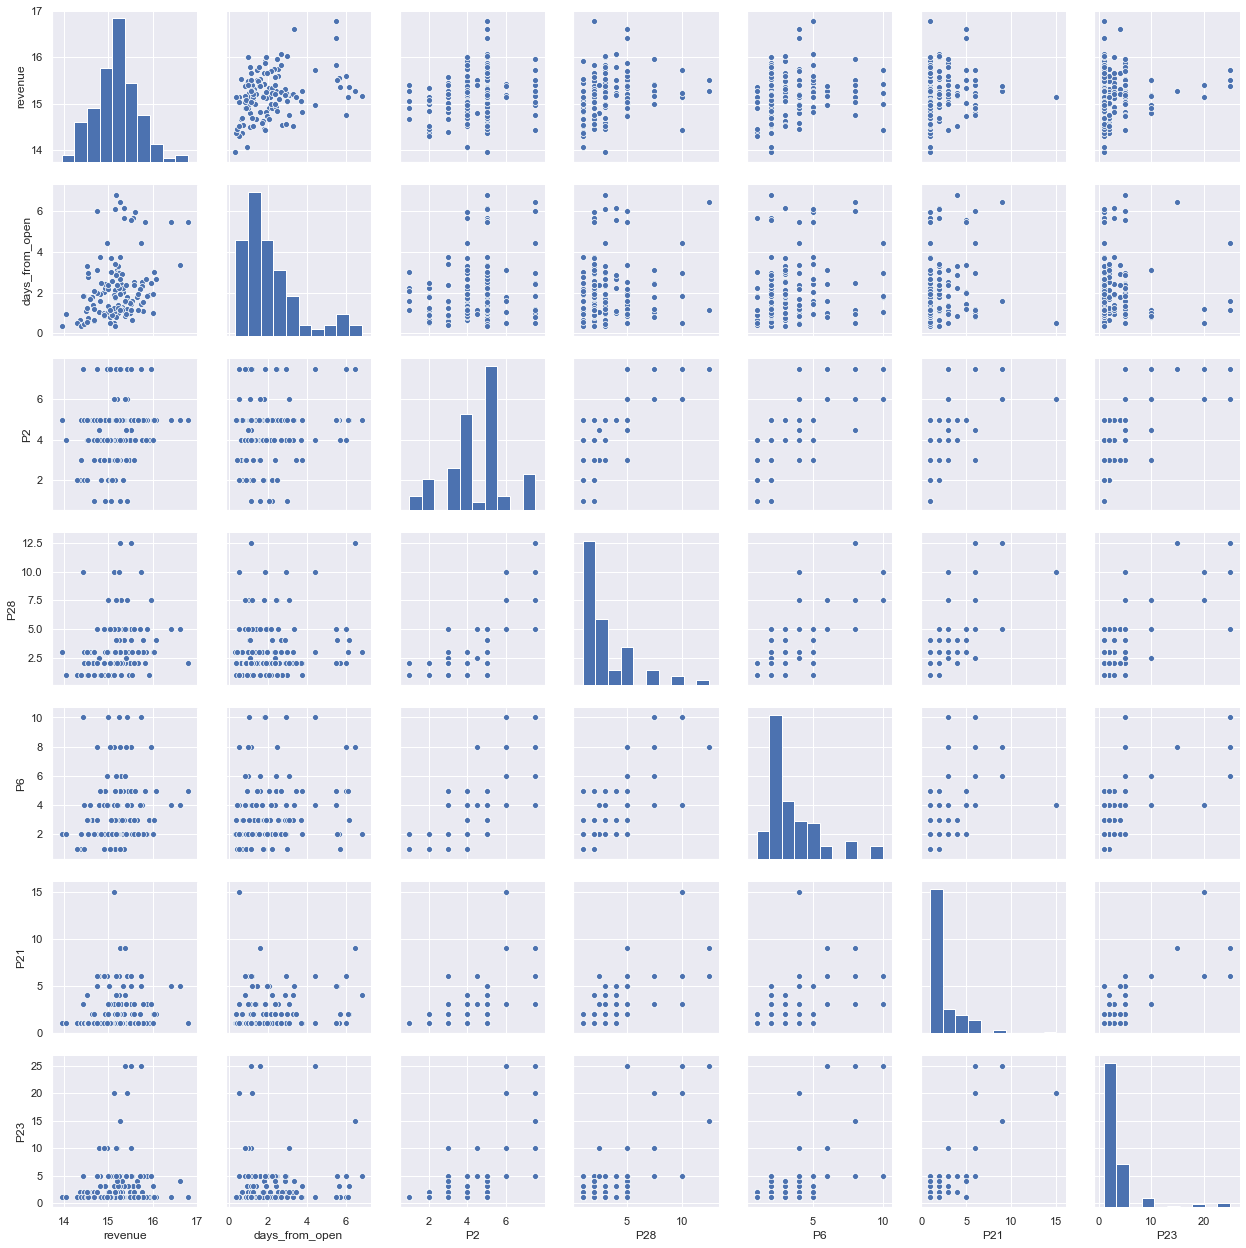

In [167]:
#相関関係上位6位までをpairplotで見てみる
#オープンからの年数と収益に相関がありそう
sns.pairplot(data=n_data[n_data['DataIs'] == 'train'][['revenue','days_from_open','P2','P28','P6','P21','P23']])

In [168]:
#訓練データとテストデータに分割
train = n_data[n_data['DataIs']=='train']
test = n_data[n_data['DataIs']=='test']

In [169]:
train.shape, test.shape

((137, 50), (100000, 50))

In [170]:
#訓練データとテストデータから、モデル作成に必要のない特徴量を削除
train = train.drop(['Id','DataIs','City','City Group','Type'], axis=1)
test = test.drop(['Id','DataIs','City','City Group','Type','revenue'], axis=1)

In [171]:
train.shape, test.shape

((137, 45), (100000, 44))

In [172]:
train.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL,days_from_open,City Cluster
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,15.547830,1,0,0,0,1,5.647,0
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,15.750379,1,0,0,1,0,2.513,10
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,14.535971,0,1,0,0,1,0.663,10
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,14.799651,0,1,0,0,1,1.064,12
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,15.278005,0,1,0,0,1,2.063,0


In [173]:
#submit用のId列を作成
test_id = n_data[n_data['DataIs'] == 'test']['Id'].reset_index()

In [174]:
test_id = test_id.drop(columns='index')

In [175]:
test_id

,Id
0,0
1,1
2,2
3,3
4,4
...,...
99995,99995
99996,99996
99997,99997
99998,99998


モデル作成

In [176]:
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [177]:
#訓練データを、説明変数と目的変数に分割
df = train.copy()
X_train = df.drop('revenue', axis=1)
y_train = df['revenue']

- 各モデルは、k分割交差検証を行う
- 各モデルに対しグリッドサーチを行いハイパーパラメータ探索を行う

In [178]:
#lasso回帰のハイパーパラメータを探索
param = {'alpha':np.arange(0.01, 0.15, 0.01)}

gscv = GridSearchCV(Lasso(), param, cv=5)
gscv.fit(X_train, y_train)

gscv.best_params_

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.12}

In [179]:
#lasso回帰を試す
#年数と収益にとても低いが相関がある、特徴量が多いため実施
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
lasso = Lasso(alpha=0.12, random_state=0)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(lasso, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train)
pred_train = lasso.predict(X_train)
pred_test = lasso.predict(test)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:0.2136 (0.0462)
訓練データのRMSE:0.4507
訓練データのr2:0.1146


In [180]:
#ランダムフォレストを試す
#n_estimators=150がベスト
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
rf = RandomForestRegressor(n_estimators=150 ,random_state=0)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(rf, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
rf.fit(X_train, y_train)
pred_train = rf.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:0.2152 (0.0544)
訓練データのRMSE:0.1590
訓練データのr2:0.8898


In [181]:
#勾配ブｰスティングを試す
#n_estimators=150がベスト
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
gb = GradientBoostingRegressor(n_estimators=150, random_state=0)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(gb, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
gb.fit(X_train, y_train)
pred_train = gb.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:0.2502 (0.0466)
訓練データのRMSE:0.0869
訓練データのr2:0.9671


In [182]:
#カーネルリッジ回帰のハイパーパラメータを探索
param = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10]}

gscv = GridSearchCV(KernelRidge(), param, cv=5)
gscv.fit(X_train, y_train)

gscv.best_params_

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 0.0001}

In [183]:
#カーネルリッジ回帰を試す
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
KR = KernelRidge(alpha=0.0001)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(KR, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
KR.fit(X_train, y_train)
pred_train = KR.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:1.0247 (0.8955)
訓練データのRMSE:0.3806
訓練データのr2:0.3684


In [184]:
#サポートベクター回帰のハイパーパラメータを探索
param = {'kernel':['rbf'],
         'C':np.arange(0.8, 1.5, 0.1)
         }

gscv = GridSearchCV(SVR(), param, cv=5)
gscv.fit(X_train, y_train)

gscv.best_params_

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

{'C': 1.4, 'kernel': 'rbf'}

In [185]:
#サポートベクター回帰を試す
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
svr = SVR(kernel='rbf',C=1.4, gamma=0.05)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(svr, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
svr.fit(X_train, y_train)
pred_train = svr.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:0.2142 (0.0772)
訓練データのRMSE:0.1504
訓練データのr2:0.9014


In [186]:
#ElasticNet回帰のハイパーパラメータを探索
from sklearn.model_selection import GridSearchCV

param = {'alpha':np.arange(0.001, 0.1, 0.001),
         'l1_ratio':[0.1,0.3,0.5,0.7,0.9]
         }

gscv = GridSearchCV(ElasticNet(), param, cv=5)
gscv.fit(X_train, y_train)

gscv.best_params_

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6486411500815152, tolerance: 0.0022341584141213097
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3261236768044142, tolerance: 0.0026781344533739716
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03337462250494028, tolerance: 0.0025464671153488994
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2534140472775537, tolerance: 0.0026781344533739716
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003711058190988936, tolerance: 0.0025464671153488994
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03402840682608499, tolerance: 0.0024374277789329575
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013694336214019387, tolerance: 0.0026781344533739716
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.007543224926060077, tolerance: 0.0026781344533739716
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006382289301207322, tolerance: 0.0026781344533739716
  positive)
C:\Users\odash\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

{'alpha': 0.099, 'l1_ratio': 0.9}

In [187]:
#ElasticNet回帰を試す
n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=0)
EN = ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=0)
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
cross = -cross_val_score(EN, X_train, y_train, cv=kf, n_jobs=-1,scoring='neg_mean_squared_error')
EN.fit(X_train, y_train)
pred_train = EN.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
#print(np.exp(pred_train))

訓練データの交差検証:0.2135 (0.0479)
訓練データのRMSE:0.4451
訓練データのr2:0.1363


アンサンブル学習

In [188]:
#アンサンブルモデル作成のクラス
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    #データに適合されるために、元のモデルのクローン(複製)を定義
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        #複製したモデルの配列をそれぞれfitさせる
        for model in self.models_:
            model.fit(X, y)
        #fitした複製モデルを返す 
        return self
        
    #fitした複製モデルの予測predictとその結果の平均meanを行う
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) #1次元配列を重ねて二次元配列にしたものの平

- モデルの中で、LassoとRandomForestがスコアが良いのでアンサンブル学習してみる
- その他モデルは単体並びにアンサンブル学習を行うと、kaggle上のpublicスコアとprivateスコアの乖離＝過学習がみられる

In [189]:
#アンサンブルモデルの学習
averaged_models = AveragingModels(models = [rf, lasso])
averaged_models

AveragingModels(models=[RandomForestRegressor(bootstrap=True, criterion='mse',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
                        Lasso(alpha=0.12, copy_X=True, fit_intercept=True,
                              max_iter=1000, normalize=False, pos

In [190]:
#アンサンブル学習の評価
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
averaged_models.fit(X_train, y_train)
pred_train = averaged_models.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(pred_train, y_train))
print('訓練データの交差検証:{:.4f} ({:.4f})'.format(cross.mean(),cross.std()))
print('訓練データのRMSE:{:.4f}'.format(train_rmse))
print('訓練データのr2:{:.4f}'.format(r2_score(y_true=y_train, y_pred=pred_train)))
print(np.exp(pred_train))

訓練データの交差検証:0.2135 (0.0479)
訓練データのRMSE:0.2951
訓練データのr2:0.6204
[4867586.00540105 5055167.16332819 2663482.10279474 3233766.58029065
 3920492.2487637  4604469.07145864 4205743.81908266 4063974.48346214
 4110922.85225831 4558847.58988572 4023131.15934293 3949829.31768196
 2531546.55370407 4271635.53633003 3019209.84943851 3672493.09483
 7620487.19608207 4444874.45421725 4164441.92749504 3017005.97857778
 4196895.95676802 2363307.39699415 4506536.19260513 3539993.3814949
 5061223.14221369 3817752.7874071  3215477.38074596 5158116.24637157
 4894409.57382111 3765325.1210019  3437107.40512809 2915263.80137165
 3600982.16787041 2886649.28661    4150677.97859386 4720050.7918861
 3791357.67383557 3454523.9117137  4632484.88327628 4070206.84147791
 4571085.11941711 4353028.10851441 4454801.59643713 3366155.72558804
 4077569.03064961 3966501.16065245 3939811.27334283 5025204.57931839
 4711448.93636489 5513581.86427354 3236929.05476451 3526230.04350985
 2508017.36919162 3913299.10740836 4540156.7654

In [98]:
#一つ一つのモデルの結果出力
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
lasso.fit(X_train, y_train)
test_revenue = pd.DataFrame(np.exp(lasso.predict(test)), columns=['Prediction'])
test_Id = pd.DataFrame(test_id, columns=['Id'])
df_model = pd.concat([test_Id, test_revenue], axis=1)
df_model.to_csv('../.kaggle/sample_data/restaurant-revenue-prediction/submission_rf.csv', index=False)

In [191]:
#アンサンブルモデルの結果出力
scaler = MinMaxScaler()
scaler.fit_transform(X_train, y_train)
averaged_models.fit(X_train, y_train)
test_revenue = pd.DataFrame(np.exp(averaged_models.predict(test)), columns=['Prediction'])
test_Id = pd.DataFrame(test_id, columns=['Id'])
df_model = pd.concat([test_Id, test_revenue], axis=1)
df_model.to_csv('../.kaggle/sample_data/restaurant-revenue-prediction/submission_rf.csv', index=False)